In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.base import BaseEstimator, TransformerMixin

In [2]:
training_data = pd.read_csv('../Data/RossmannStoreSales/train.csv', low_memory=False)
testing_data = pd.read_csv('../Data/RossmannStoreSales/test.csv')
store_data = pd.read_csv('../Data/RossmannStoreSales/store.csv')

print('After Load: ', end='\n  ')
print(f'Traininig Data Shape: {training_data.shape}', f'Testinig Data Shape: {testing_data.shape}', f'Store Data Shape: {store_data.shape}', sep='\n  ')

After Load: 
  Traininig Data Shape: (1017209, 9)
  Testinig Data Shape: (41088, 8)
  Store Data Shape: (1115, 10)


In [3]:
training_data = training_data.merge(store_data, how='left', on='Store')
print(f'After Merge Training Shape: {training_data.shape}')
training_data.head()

After Merge Training Shape: (1017209, 18)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [10]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [ ]:
training_data['Promo2'] = training_data['Promo2'].astype('object')
training_data['Promo'] = training_data['Promo'].astype('object')
training_data['SchoolHoliday'] = training_data['SchoolHoliday'].astype('object')
training_data['Open'] = training_data['Open'].astype('object')

In [15]:
training_data.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

<Axes: ylabel='Frequency'>

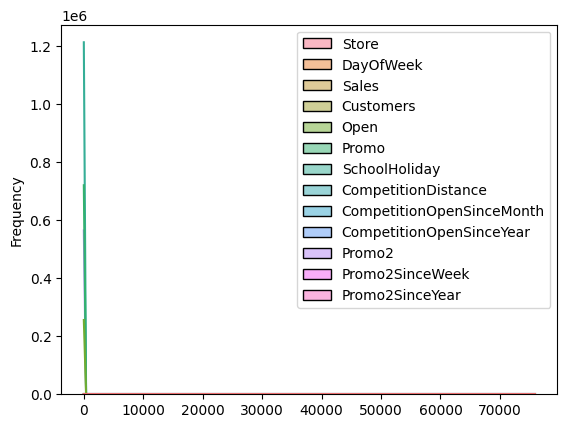

In [ ]:
# cust imputer that does all imputations and add missing indica

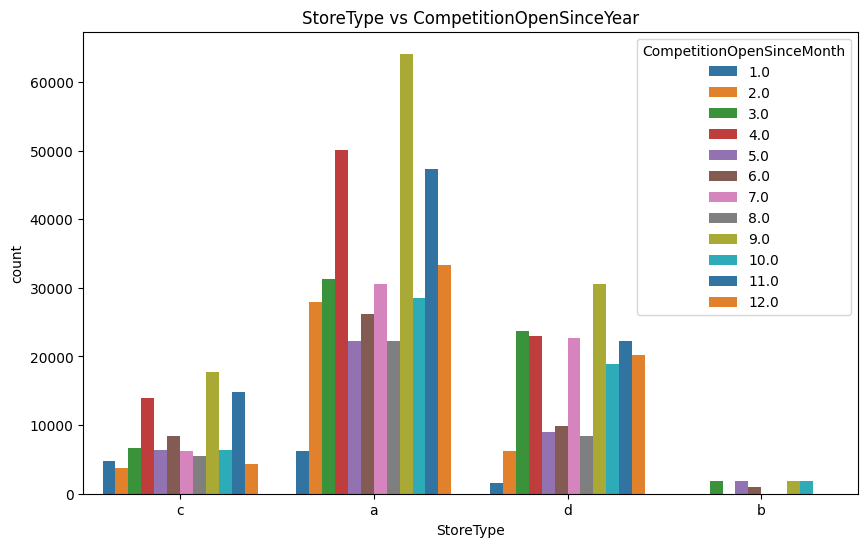

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot()
plt.show()

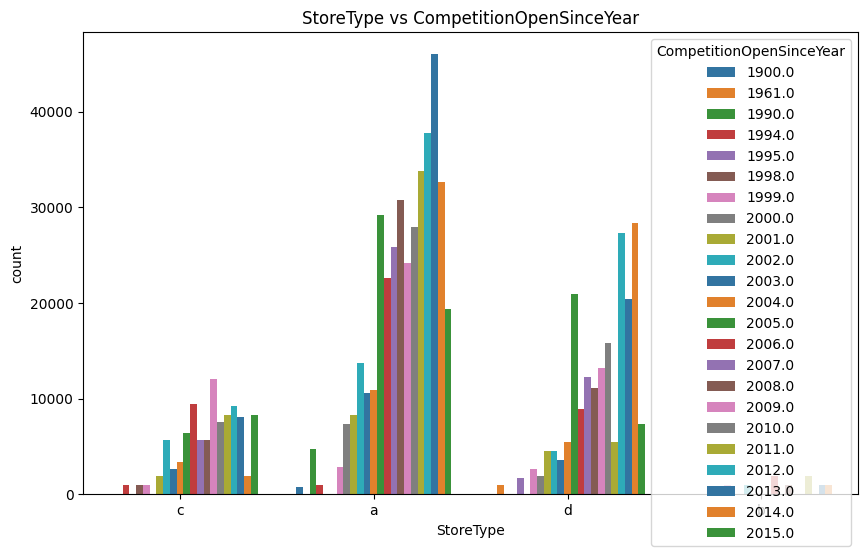

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(x='StoreType', data=training_data, hue='CompetitionOpenSinceYear', palette='tab10')
plt.title('StoreType vs CompetitionOpenSinceYear')
plt.show()